# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**FM1 TEAM**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### TEAM MEMBERS
<a>1. Tamika Govington</a>

<a>2. Jean Rabothata</a>

<a>3. Dikeledi Ramohlola</a>

<a>4. Amukelani Mabunda</a> 

<a>5. Thabatha Nompoko</a>

<a>6. Koketso Itumeleng Mahlangu </a>


### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

## PROBLEM STATEMENT

The government wants to understand how much renewable energy they need to make sure everyone has enough electricity, day and night. That's where we come in! we're going to help them figure out how much more wind and solar they need to make up for the energy they're not getting from fossil fuels.

Our goal in handling the data was to check the possibility of daily electricity shortfall for 3hr periods in five different cities in spain namely: Barcelona; Madrid; Valencia; Seville and Bilbao.This helps to predict how much energy the wind and sun can provide, and how much more the country needs from other sources.
The government of Spain is considering an expansion of its renewable energy resource infrastructure investments, therefore we needed to compare and evaluate the sustainability of non-renewable resources against that of renewable resources by checking the trends and patterns of the countries renewable resources and fossil fuel energy generation. 
The aim is to maintain and improve the standard of living by investing in electricity infrastructure.


## OBJECTIVES 

Explore and visualize the dataset.

Clean and engineer the dataset.

Build several models that will predict the 3 hourly load shortfall.

Assess the accuracy of the models.

Choose the best model to make predictions.

## FEATURES 

Time: Weather conditions in each city at a particular date and time
    
Wind_speed: Wind speed in each city
    
Wind_deg: The direction of the wind in each city
    
Pressure: Atmospheric pressure in each city
    
Rain: The amount of rain in each city in 1 hour or 3 hours
    
Snow: The amount of snowfall in each city
    
Cloud_all: Percentage cloud coverage in each city

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>


<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>3.1 Univariate Analysis: Non-Graphical</a>

<a href=#five>3.2 Univariate Analysis: Graphical</a>

<a href=#six>3.3 Multivariate Analysis: Non-Graphical</a>

<a href=#seven>3.4 Multivariate Analysis: Graphical</a>


<a href=#eight>4. Data Engineering</a>

<a href=#nine>5. Modeling</a>

<a href=#ten>6. Model Performance</a>

<a href=#eleven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.graphics.correlation import plot_corr
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.feature_selection import SelectKBest, f_regression
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn import ensemble

#Libraries for Model Performance
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 

#Library for creating pickle files of the models
import pickle as pkl

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 80

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
#Loading the data
df_train = pd.read_csv("df_train.csv")
df_test = pd.read_csv("df_test.csv")

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


Exploratory Data Analysis (EDA) is an analysis approach that identifies general patterns in the data. These patterns include outliers and features of the data that might be unexpected


***Basic Analysis***

Using these four commands, we will perform a basic analysis:

- df.head()
- df.shape
- df.info()
- df.describe()

In [3]:
# look at data statistics
df_train.head()

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0           0  2015-01-01 03:00:00           0.666667           level_5   
1           1  2015-01-01 06:00:00           0.333333          level_10   
2           2  2015-01-01 09:00:00           1.000000           level_9   
3           3  2015-01-01 12:00:00           1.000000           level_8   
4           4  2015-01-01 15:00:00           1.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   
2             0.0             1.000000         71.333333        64.333333   
3             0.0             1.000000         65.333333        56.333333   
4             0.0             1.000000         59.000000        57.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Madrid_temp_max  Barcelona_temp  \
0                0.0           1.000000  ...       265.938000      281.013000   
1                0.0           1.000000  ...       266.386667      280.561667   
2                0.0           1.000000  ...       272.708667      281.583667   
3                0.0           1.000000  ...       281.895219      283.434104   
4                2.0           0.333333  ...       280.678437      284.213167   

   Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  \
0       269.338615   269.338615          281.013000       269.338615   
1       270.376000   270.376000          280.561667       270.376000   
2       275.027229   275.027229          281.583667       275.027229   
3       281.135063   281.135063          283.434104       281.135063   
4       282.252063   282.252063          284.213167       282.252063   

   Seville_temp_min Madrid_temp  Madrid_temp_min  load_shortfall_3h  
0        274.254667  265.938000       265.938000        6715.666667  
1        274.945000  266.386667       266.386667        4171.666667  
2        278.792000  272.708667       272.708667        4274.666667  
3        285.394000  281.895219       281.895219        5075.666667  
4        285.513719  280.678437       280.678437        6620.666667  

[5 rows x 49 columns]

Looking at the top rows of our data we can see all our features as well as the types of data we are working with.

Our features are:

Unnamed: 0, time, Madrid_wind_speed, Valencia_wind_deg, Bilbao_rain_1h, Valencia_wind_speed, Seville_humidity, Madrid_humidity, Bilbao_clouds_all,	Bilbao_wind_speed, Madrid_temp_max, Barcelona_temp, Bilbao_temp_min, Bilbao_temp, Barcelona_temp_min	Bilbao_temp_max, Seville_temp_min, Madrid_temp, Madrid_temp_min,load_shortfall_3h
	
Note:  Barcelona_temp_max is not displayed in train data head but its displayed in test data head
   


In [4]:
df_test.head()

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0        8763  2018-01-01 00:00:00           5.000000           level_8   
1        8764  2018-01-01 03:00:00           4.666667           level_8   
2        8765  2018-01-01 06:00:00           2.333333           level_7   
3        8766  2018-01-01 09:00:00           2.666667           level_7   
4        8767  2018-01-01 12:00:00           4.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             5.000000         87.000000        71.333333   
1             0.0             5.333333         89.000000        78.000000   
2             0.0             5.000000         89.000000        89.666667   
3             0.0             5.333333         93.333333        82.666667   
4             0.0             8.666667         65.333333        64.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Barcelona_temp_max  \
0          20.000000           3.000000  ...          287.816667   
1           0.000000           3.666667  ...          284.816667   
2           0.000000           2.333333  ...          284.483333   
3          26.666667           5.666667  ...          284.150000   
4          26.666667          10.666667  ...          287.483333   

   Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  \
0       280.816667      287.356667       276.150000   280.380000   
1       280.483333      284.190000       277.816667   281.010000   
2       276.483333      283.150000       276.816667   279.196667   
3       277.150000      283.190000       279.150000   281.740000   
4       281.150000      286.816667       281.816667   284.116667   

   Barcelona_temp_min  Bilbao_temp_max Seville_temp_min  Madrid_temp  \
0          286.816667       285.150000       283.150000   279.866667   
1          283.483333       284.150000       281.150000   279.193333   
2          281.816667       282.150000       280.483333   276.340000   
3          282.150000       284.483333       279.150000   275.953333   
4          286.150000       286.816667       284.483333   280.686667   

   Madrid_temp_min  
0       279.150000  
1       278.150000  
2       276.150000  
3       274.483333  
4       280.150000  

[5 rows x 48 columns]

Looking at the top rows of our data we can see all our features as well as the types of data we are working with.

Our features are:
    
Unnamed: 0,
    time,
    Madrid_wind_speed,
    Valencia_wind_deg,
    Bilbao_rain_1h,
    Valencia_wind_speed,
    Seville_humidity,
    Madrid_humidity,
    Bilbao_clouds_all,
    Bilbao_wind_speed,
    Barcelona_temp_max,
    Madrid_temp_max,
    Barcelona_temp,
    Bilbao_temp_min,
    Bilbao_temp,
    Barcelona_temp_min,
    Bilbao_temp_max,
    Seville_temp_min,
    Madrid_temp,
    Madrid_temp_min
    
    Note: "load_shortfall_3h" is not displayed in test data head but its displayed in train data head. The aim is to predict that missing feature.
    

In [5]:
# the data shapes 
df_train.shape

(8763, 49)

The shape command shows us that we have 8763 rows of data and 49 features.

In [6]:
df_test.shape

(2920, 48)

The shape command shows us that we have 2920 rows of data and 48 features.

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

The info command confirms our categorical and numerical features. If a feature (variable) is categorical the Dtype is **object** and if it is a numerical variable the Dtype is an **int64** or **float64**. 

Key take-away:

categorical variables: 3 columns of Catergorical types(Seville_pressure,Valencia_wind_deg and time)
-numerical variables: 45 columns of numerical types
-missing data:1 (valencia_pressure has some missing values)

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2920 non-null   int64  
 1   time                  2920 non-null   object 
 2   Madrid_wind_speed     2920 non-null   float64
 3   Valencia_wind_deg     2920 non-null   object 
 4   Bilbao_rain_1h        2920 non-null   float64
 5   Valencia_wind_speed   2920 non-null   float64
 6   Seville_humidity      2920 non-null   float64
 7   Madrid_humidity       2920 non-null   float64
 8   Bilbao_clouds_all     2920 non-null   float64
 9   Bilbao_wind_speed     2920 non-null   float64
 10  Seville_clouds_all    2920 non-null   float64
 11  Bilbao_wind_deg       2920 non-null   float64
 12  Barcelona_wind_speed  2920 non-null   float64
 13  Barcelona_wind_deg    2920 non-null   float64
 14  Madrid_clouds_all     2920 non-null   float64
 15  Seville_wind_speed   

Null values for each feature can also be checked by using the following command:

    - df.isnull().sum()
    
This command will provide the total number of null values appearing in each feature.

In [9]:
df_train.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

This shows that there are 2068 null values in the train data ("Valencia_pressure")

In [10]:
df_test.isnull().sum()

Unnamed: 0                0
time                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp        

This shows that there are 454 null values in the test data ("Valencia_pressure")

In [11]:
#missing training_data and its percentage
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_training_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_training_data.head()

Total   Percent
Valencia_pressure    2068  0.235992
Unnamed: 0              0  0.000000
Madrid_weather_id       0  0.000000
Bilbao_pressure         0  0.000000
Seville_weather_id      0  0.000000

Valencia_ pressure(train data) is the only feature with missing entries of 23.6%

In [12]:
#Missing entries in test data and its percentage
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_training_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_training_data.head()

Total   Percent
Valencia_pressure       454  0.155479
Unnamed: 0                0  0.000000
time                      0  0.000000
Barcelona_weather_id      0  0.000000
Bilbao_pressure           0  0.000000

Valencia_pressure(test data) is the only feature with missing entries of 15.5%

### Seperation of features based on data type

Features are being seperated for further analysis, without datatype disruption

In [13]:
# seperation of Numerical features and catergorical features in the train data
numbers = ['int64', 'float64']
df_num_train = df_train.select_dtypes(include=numbers)# select numerical feature
df_cat_train= df_train.select_dtypes(include='object')# select catergorical features

In [14]:
# seperation of Numerical features and catergorical features in the test data
numbers = ['int64', 'float64']
df_num_test = df_test.select_dtypes(include=numbers)# select numerical feature
df_cat_test= df_test.select_dtypes(include='object')# select catergorical features

<a id="four"></a>
## 3.1. Univariate Analysis: Non-Graphical
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

The first univariate analysis will be non-graphical. This is where we will be looking at the descriptive statistics of each feature. We can get the descriptive statistics of each numerical feature by using the following command:

- df.describe()

This command will provide the mean, standard deviation and a five number summary of each numerical feature. The five number summary (Minimum, Lower Quartile (Q1) = 25%, Median (Q2) = 50%, Upper Quartile (Q3) = 75%, Maximum) is also used for creating the box plot.

In [15]:
#Description for numerical features only(train data)
df_num_train.describe()

Unnamed: 0  Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
count  8763.000000        8763.000000     8763.000000          8763.000000   
mean   4381.000000           2.425729        0.135753             2.586272   
std    2529.804538           1.850371        0.374901             2.411190   
min       0.000000           0.000000        0.000000             0.000000   
25%    2190.500000           1.000000        0.000000             1.000000   
50%    4381.000000           2.000000        0.000000             1.666667   
75%    6571.500000           3.333333        0.100000             3.666667   
max    8762.000000          13.000000        3.000000            52.000000   

       Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
count       8763.000000      8763.000000        8763.000000   
mean          62.658793        57.414717          43.469132   
std           22.621226        24.335396          32.551044   
min            8.333333         6.333333           0.000000   
25%           44.333333        36.333333          10.000000   
50%           65.666667        58.000000          45.000000   
75%           82.000000        78.666667          75.000000   
max          100.000000       100.000000         100.000000   

       Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  ...  \
count        8763.000000         8763.000000      8763.000000  ...   
mean            1.850356           13.714748       158.957511  ...   
std             1.695888           24.272482       102.056299  ...   
min             0.000000            0.000000         0.000000  ...   
25%             0.666667            0.000000        73.333333  ...   
50%             1.000000            0.000000       147.000000  ...   
75%             2.666667           20.000000       234.000000  ...   
max            12.666667           97.333333       359.333333  ...   

       Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  \
count      8763.000000     8763.000000      8763.000000  8763.000000   
mean        289.540309      289.855459       285.017973   286.422929   
std           9.752047        6.528111         6.705672     6.818682   
min         264.983333      270.816667       264.483333   267.483333   
25%         282.150000      284.973443       280.085167   281.374167   
50%         288.116177      289.416667       284.816667   286.158333   
75%         296.816667      294.909000       289.816667   291.034167   
max         314.483333      307.316667       309.816667   310.710000   

       Barcelona_temp_min  Bilbao_temp_max  Seville_temp_min  Madrid_temp  \
count         8763.000000      8763.000000       8763.000000  8763.000000   
mean           288.447422       287.966027        291.633356   288.419439   
std              6.102593         7.105590          8.178220     9.346796   
min            269.483333       269.063000        270.150000   264.983333   
25%            284.150000       282.836776        285.816667   281.404281   
50%            288.150000       287.630000        290.816667   287.053333   
75%            292.966667       292.483333        297.150000   295.154667   
max            304.816667       317.966667        314.816667   313.133333   

       Madrid_temp_min  load_shortfall_3h  
count      8763.000000        8763.000000  
mean        287.202203       10673.857612  
std           9.206237        5218.046404  
min         264.983333       -6618.000000  
25%         280.299167        7390.333333  
50%         286.083333       11114.666667  
75%         293.884500       14498.166667  
max         310.383333       31904.000000  

[8 rows x 46 columns]

In [16]:
#Description for numerical features only(test data)
df_num_test.describe()

Unnamed: 0  Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
count   2920.000000        2920.000000     2920.000000          2920.000000   
mean   10222.500000           2.457820        0.067517             3.012785   
std      843.075718           1.774838        0.153381             1.996340   
min     8763.000000           0.000000        0.000000             0.000000   
25%     9492.750000           1.333333        0.000000             1.666667   
50%    10222.500000           2.000000        0.000000             2.333333   
75%    10952.250000           3.333333        0.000000             4.000000   
max    11682.000000          13.333333        1.600000            14.333333   

       Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
count       2920.000000      2920.000000        2920.000000   
mean          67.123516        62.644463          43.355422   
std           20.611292        24.138393          30.486298   
min           11.666667         8.000000           0.000000   
25%           52.000000        43.000000          13.333333   
50%           70.333333        63.000000          45.000000   
75%           85.000000        84.000000          75.000000   
max          100.000000       100.000000          97.333333   

       Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  ...  \
count        2920.000000         2920.000000      2920.000000  ...   
mean            2.283562           15.477283       162.643836  ...   
std             1.654787           25.289197        97.749873  ...   
min             0.000000            0.000000         0.000000  ...   
25%             1.000000            0.000000        86.666667  ...   
50%             1.666667            0.000000       140.000000  ...   
75%             3.333333           20.000000       233.333333  ...   
max            10.666667           93.333333       360.000000  ...   

       Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  \
count         2920.000000      2920.000000     2920.000000      2920.000000   
mean           290.695462       288.888393      289.911289       284.920684   
std              7.113599         9.089699        7.119411         6.803424   
min            273.816667       269.816667      272.650000       266.483333   
25%            284.816667       281.483333      284.307500       280.150000   
50%            290.150000       287.483333      289.483333       284.483333   
75%            296.483333       295.483333      295.816667       289.816667   
max            309.483333       313.483333      308.150000       307.483333   

       Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  Seville_temp_min  \
count  2920.000000         2920.000000      2920.000000       2920.000000   
mean    286.522375          289.124971       288.483641        290.152431   
std       6.492355            7.168049         6.221324          7.906915   
min     268.120000          271.483333       270.138667        271.150000   
25%     281.778333          283.483333       284.150000        284.483333   
50%     286.265000          288.816667       288.483333        289.150000   
75%     291.119167          295.150000       292.816667        295.150000   
max     308.966667          306.816667       310.816667        314.483333   

       Madrid_temp  Madrid_temp_min  
count  2920.000000      2920.000000  
mean    287.869763       286.618130  
std       8.977511         8.733163  
min     268.713333       267.816667  
25%     280.816667       279.816667  
50%     286.396667       285.483333  
75%     294.452500       293.150000  
max     312.223333       310.150000  

[8 rows x 45 columns]

In [17]:
df_num_train.skew()

Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

In [18]:
df_num_test.skew()

Unnamed: 0               0.000000
Madrid_wind_speed        1.494269
Bilbao_rain_1h           3.404307
Valencia_wind_speed      1.328872
Seville_humidity        -0.508637
Madrid_humidity         -0.135537
Bilbao_clouds_all       -0.124933
Bilbao_wind_speed        1.381876
Seville_clouds_all       1.628723
Bilbao_wind_deg          0.322569
Barcelona_wind_speed     1.080200
Barcelona_wind_deg      -0.029036
Madrid_clouds_all        0.925034
Seville_wind_speed       1.346297
Barcelona_rain_1h        5.989675
Seville_rain_1h          6.269205
Bilbao_snow_3h           0.000000
Barcelona_pressure      -0.572509
Seville_rain_3h         54.037024
Madrid_rain_1h           5.211963
Barcelona_rain_3h       40.017330
Valencia_snow_3h         0.000000
Madrid_weather_id       -2.439600
Barcelona_weather_id    -2.577583
Bilbao_pressure         -0.952458
Seville_weather_id      -3.103741
Valencia_pressure       -1.779108
Seville_temp_max         0.473503
Madrid_pressure         -2.608926
Valencia_temp_

Barcelona_rain_3h & Seville_rain_3h are outliers 

In [19]:
print(df_train.columns)

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

<a id="five"></a>
## 3.2 Univariate Analysis: Graphical
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a> 

You can look at the distribution of any numerical feature by using the following plots:
- box plot
- histogram
- density plot
- violin plot
For a categorical feature we will use a:

- bar plot

<Axes: >

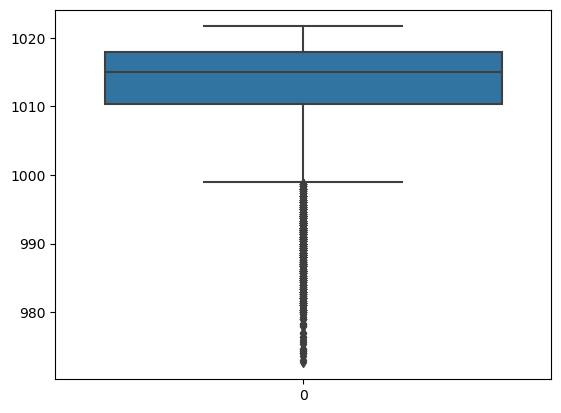

In [20]:
sns.boxplot(df_train['Valencia_pressure'])

Boxplot above indicates the mode value we're looking for, which is between 1010 & 1020

In [21]:
df_train['Valencia_pressure'].mode()

0    1018.0
Name: Valencia_pressure, dtype: float64

In [22]:
df_clean = df_train

In [23]:
df_clean['Valencia_pressure'] = df_clean['Valencia_pressure'].fillna(df_clean['Valencia_pressure'].mode()[0])

In [24]:
#Checking if null value is gone
df_clean.isnull().sum()

Unnamed: 0              0
time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_te

<Figure size 1200x480 with 0 Axes>

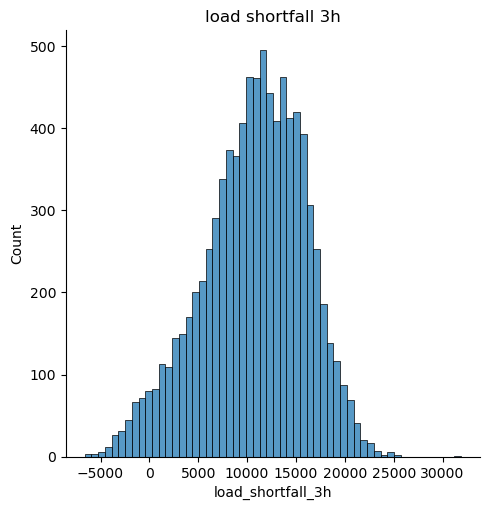

In [25]:
# plot relevant feature interactions
from matplotlib.pyplot import figure
figure(figsize=(15, 6), dpi=80)
sns.displot(df_clean['load_shortfall_3h'])
plt.title('load shortfall 3h')
plt.show()

The target variable(train data) is fairly symetrical

In [26]:
features_to_plot = ['Seville_temp', 'Valencia_temp', 'Barcelona_temp', 'Madrid_temp'] 

Text(0.5, 1.0, 'Temperature in 4 Cities')

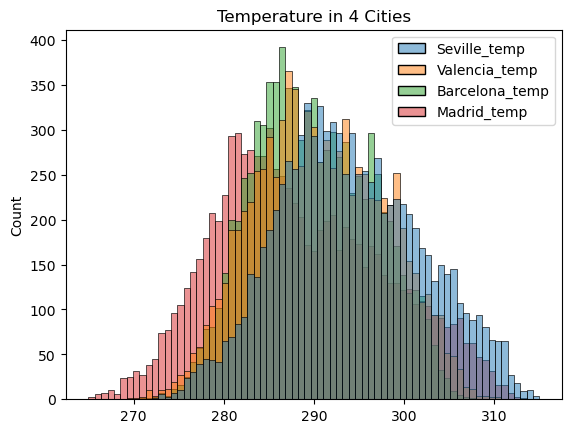

In [29]:
sns.histplot(df_clean[features_to_plot])
plt.title('Temperature in 4 Cities')

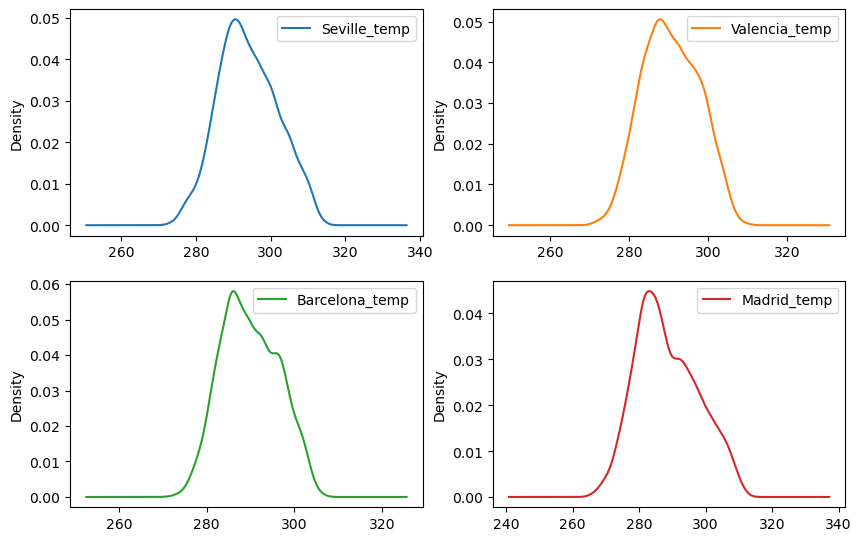

In [30]:
df_clean[features_to_plot].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10));

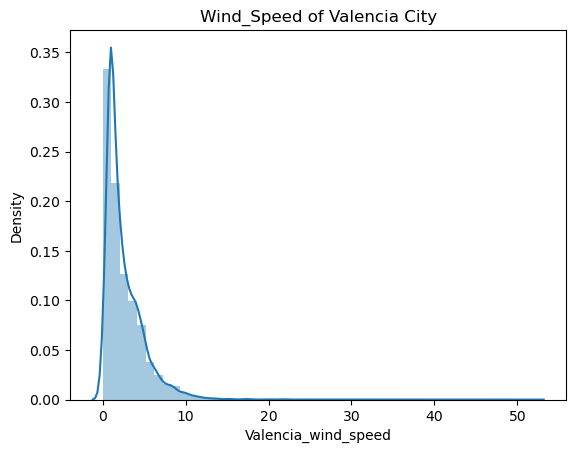

In [31]:
sns.distplot(df_train['Valencia_wind_speed'])
plt.title('Wind_Speed of Valencia City')
plt.show()

This shows that wind_speed across Valencia_city are not normally distributed (unevenly distributed ) and skewed to the right

<a id="six"></a>
## 3.3 Multivariate Analysis: Non-Graphical 
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

For this analysis, we can determine the relationship between any two numerical features by calculating the correlation coefficient. Correlation is a measure of the degree to which two variables change together, if at all. If two features have a strong positive correlation, it means that if the value of one feature increases, the value of the other feature also increases. There are three different correlation measures:

- Pearson correlation 
- Spearman rank correlation
- Kendall correlation

In [32]:
# evaluate correlation
df_num_train.corr()

Unnamed: 0  Madrid_wind_speed  Bilbao_rain_1h  \
Unnamed: 0              1.000000          -0.109288       -0.249633   
Madrid_wind_speed      -0.109288           1.000000        0.259719   
Bilbao_rain_1h         -0.249633           0.259719        1.000000   
Valencia_wind_speed    -0.090161           0.513092        0.265864   
Seville_humidity       -0.079025          -0.117892        0.069878   
Madrid_humidity        -0.103359          -0.137092        0.106765   
Bilbao_clouds_all      -0.068123           0.244001        0.370733   
Bilbao_wind_speed       0.049197           0.377854        0.085398   
Seville_clouds_all     -0.140583           0.191251        0.081131   
Bilbao_wind_deg        -0.155738           0.270950        0.279350   
Barcelona_wind_speed   -0.218781           0.294640        0.069997   
Barcelona_wind_deg     -0.140449          -0.095380       -0.030723   
Madrid_clouds_all      -0.116928           0.230126        0.135524   
Seville_wind_speed     -0.093926           0.434104        0.140101   
Barcelona_rain_1h      -0.075692           0.062758        0.052558   
Seville_rain_1h        -0.075340           0.108413        0.092984   
Bilbao_snow_3h         -0.092377           0.071183        0.096730   
Barcelona_pressure     -0.040157           0.011134        0.052458   
Seville_rain_3h        -0.082525           0.004795        0.016392   
Madrid_rain_1h         -0.068980           0.150446        0.187423   
Barcelona_rain_3h      -0.104326          -0.014644       -0.001412   
Valencia_snow_3h       -0.028130           0.021660        0.008269   
Madrid_weather_id       0.047202          -0.169358       -0.147768   
Barcelona_weather_id    0.034761          -0.099582       -0.120618   
Bilbao_pressure        -0.022475          -0.231747       -0.054814   
Seville_weather_id      0.072472          -0.120014       -0.095723   
Valencia_pressure       0.267772          -0.157088       -0.206765   
Seville_temp_max        0.039424           0.050043       -0.210323   
Madrid_pressure         0.385578          -0.136672       -0.298587   
Valencia_temp_max       0.087002           0.133468       -0.135198   
Valencia_temp           0.135294           0.128726       -0.127953   
Bilbao_weather_id       0.192485          -0.238128       -0.604616   
Seville_temp            0.042897           0.090861       -0.170009   
Valencia_humidity       0.023917          -0.285787       -0.103868   
Valencia_temp_min       0.185468           0.119657       -0.116835   
Barcelona_temp_max      0.047417           0.061854       -0.157326   
Madrid_temp_max         0.093378           0.091464       -0.148397   
Barcelona_temp          0.068078           0.080133       -0.138901   
Bilbao_temp_min         0.028698           0.077330       -0.141269   
Bilbao_temp             0.081799           0.060467       -0.182494   
Barcelona_temp_min      0.103436           0.089992       -0.106593   
Bilbao_temp_max         0.146216           0.042114       -0.219871   
Seville_temp_min        0.037487           0.110278       -0.120575   
Madrid_temp             0.088439           0.109572       -0.135927   
Madrid_temp_min         0.085197           0.098138       -0.116431   
load_shortfall_3h       0.192612          -0.150981       -0.152510   

                      Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
Unnamed: 0                      -0.090161         -0.079025        -0.103359   
Madrid_wind_speed                0.513092         -0.117892        -0.137092   
Bilbao_rain_1h                   0.265864          0.069878         0.106765   
Valencia_wind_speed              1.000000         -0.075227        -0.019388   
Seville_humidity                -0.075227          1.000000         0.799831   
Madrid_humidity                 -0.019388          0.799831         1.000000   
Bilbao_clouds_all                0.210524          0.061680         0.041878   
Bilbao_wind_speed                0.386478   

<a id="seven"></a>
## 3.4 Multivariate Analysis: Graphical 
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

For the multivariate graphical analysis the following visualisations will be considered:

- Heatmap
- Scatter Plot
- Pair Plot
- Joint Plot
- Bubble Plot
Heatmap
The relationship between features can also be displayed graphically using a heatmap. The Seaborn library will be used for this basic heatmap visualisation.

<Axes: >

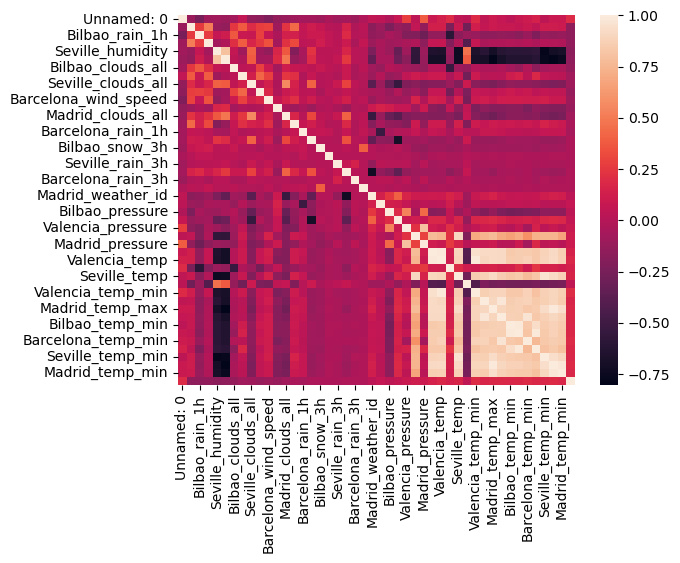

In [33]:
#Correlation heatmap
sns.heatmap(df_num_train.corr())

 Correlation heat map showing relationship among variables in train data(Numerical)

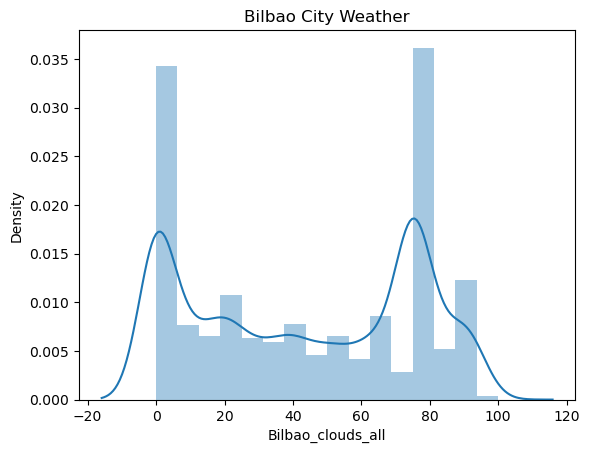

In [34]:
sns.distplot(df_train['Bilbao_clouds_all'])
plt.title('Bilbao City Weather')
plt.show()

This shows that cloud_coverage across all cities in spain are not normally distributed. 

<a id="five"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [35]:
# remove missing values/ features
train_df = df_clean.drop(['Unnamed: 0'], axis=1)
#create a copy 
train_copy_df = train_df.copy(deep = True)

In [36]:
# checking if unamed:0 is dropped
train_df.head()

time  Madrid_wind_speed Valencia_wind_deg  Bilbao_rain_1h  \
0  2015-01-01 03:00:00           0.666667           level_5             0.0   
1  2015-01-01 06:00:00           0.333333          level_10             0.0   
2  2015-01-01 09:00:00           1.000000           level_9             0.0   
3  2015-01-01 12:00:00           1.000000           level_8             0.0   
4  2015-01-01 15:00:00           1.000000           level_7             0.0   

   Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
0             0.666667         74.333333        64.000000                0.0   
1             1.666667         78.333333        64.666667                0.0   
2             1.000000         71.333333        64.333333                0.0   
3             1.000000         65.333333        56.333333                0.0   
4             1.000000         59.000000        57.000000                2.0   

   Bilbao_wind_speed  Seville_clouds_all  ...  Madrid_temp_max  \
0           1.000000                 0.0  ...       265.938000   
1           1.000000                 0.0  ...       266.386667   
2           1.000000                 0.0  ...       272.708667   
3           1.000000                 0.0  ...       281.895219   
4           0.333333                 0.0  ...       280.678437   

   Barcelona_temp  Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  \
0      281.013000       269.338615   269.338615          281.013000   
1      280.561667       270.376000   270.376000          280.561667   
2      281.583667       275.027229   275.027229          281.583667   
3      283.434104       281.135063   281.135063          283.434104   
4      284.213167       282.252063   282.252063          284.213167   

   Bilbao_temp_max Seville_temp_min  Madrid_temp  Madrid_temp_min  \
0       269.338615       274.254667   265.938000       265.938000   
1       270.376000       274.945000   266.386667       266.386667   
2       275.027229       278.792000   272.708667       272.708667   
3       281.135063       285.394000   281.895219       281.895219   
4       282.252063       285.513719   280.678437       280.678437   

   load_shortfall_3h  
0        6715.666667  
1        4171.666667  
2        4274.666667  
3        5075.666667  
4        6620.666667  

[5 rows x 48 columns]

In [37]:
train_copy_df['Valencia_pressure'].corr(train_copy_df['Madrid_pressure'])

0.7603747396919314

In [38]:
train_copy_df[['Madrid_pressure', 'Valencia_pressure']].describe()

Madrid_pressure  Valencia_pressure
count      8763.000000        8763.000000
mean       1010.316920        1013.455228
std          22.198555           8.684485
min         927.666667         972.666667
25%        1012.333333        1012.666667
50%        1017.333333        1017.000000
75%        1022.000000        1018.000000
max        1038.000000        1021.666667

From the correlation matrix we saw above ,Madrid_pressure and Valencia_pressure are collinear. This gives more reason to replace the missing values in Valencia_pressure column with values from Madrid_pressure

In [39]:
train_copy_df.loc[train_copy_df['Valencia_pressure'].isna(),'Valencia_pressure'] = \
     train_copy_df.loc[train_copy_df['Valencia_pressure'].isna(), 'Madrid_pressure']

train_copy_df['Valencia_pressure'].isna().sum()

0

In [40]:
#Converting to datetime
df_clean['time']=pd.to_datetime(df_clean['time'])

In [41]:
df_clean.time

0      2015-01-01 03:00:00
1      2015-01-01 06:00:00
2      2015-01-01 09:00:00
3      2015-01-01 12:00:00
4      2015-01-01 15:00:00
               ...        
8758   2017-12-31 09:00:00
8759   2017-12-31 12:00:00
8760   2017-12-31 15:00:00
8761   2017-12-31 18:00:00
8762   2017-12-31 21:00:00
Name: time, Length: 8763, dtype: datetime64[ns]

In [42]:
# create new features
#Creating temporary timescales
df_train['time'] = pd.to_datetime(df_train.time)
df_train['Year'] = df_train[['time']].applymap(lambda dt:dt.year
 if not pd.isnull(dt.year) else 0)
df_train['Month'] = df_train[['time']].applymap(lambda dt:dt.month
 if not pd.isnull(dt.month) else 0)
df_train['Day'] = df_train[['time']].applymap(lambda dt:dt.day_name()
 if not pd.isnull(dt.day_name()) else 0)
df_train['Hours'] = df_train[['time']].applymap(lambda dt:dt.hour
 if not pd.isnull(dt.day_name()) else 0)

# Harvesting unique features in the train data
cloud =[]
temp= []
speed= []
rain= []
for col in df_num_train.columns:
    if "cloud" in col:
        cloud.append(col)
for col in df_train.columns:
    if col[-1]=="p" in col:
        temp.append(col)
for i in cloud:
    temp.append(i)
for col in df_train.columns:
    if "speed" in col:
        speed.append(col)
for col in df_train.columns:
    if "rain_3h" in col:
        rain.append(col)

df_train[temp].head()

Valencia_temp  Seville_temp  Barcelona_temp  Bilbao_temp  Madrid_temp  \
0     269.888000    274.254667      281.013000   269.338615   265.938000   
1     271.728333    274.945000      280.561667   270.376000   266.386667   
2     278.008667    278.792000      281.583667   275.027229   272.708667   
3     284.899552    285.394000      283.434104   281.135063   281.895219   
4     283.015115    285.513719      284.213167   282.252063   280.678437   

   Bilbao_clouds_all  Seville_clouds_all  Madrid_clouds_all  
0                0.0                 0.0                0.0  
1                0.0                 0.0                0.0  
2                0.0                 0.0                0.0  
3                0.0                 0.0                0.0  
4                2.0                 0.0                0.0

## Realtionships To Features:
    1.Cloud Coverage
    2.Temperature
    3.Windspeed
    4.Rain

### Cloud Coverage

In [43]:
cloud =[]
for col in df_train.columns:
    if "cloud" in col:
        cloud.append(col)
df_train[cloud].head(1)

Bilbao_clouds_all  Seville_clouds_all  Madrid_clouds_all
0                0.0                 0.0                0.0

In [44]:
temp= []
for col in df_train.columns:
    if col[-1]=="p" in col:
        temp.append(col)
temp.append("Year")
temp.append("Month")
temp.append("load_shortfall_3h")
for i in cloud:
    temp.append(i)
groupsp= df_train[temp].groupby(["Year", "Month"], as_index= False).mean()
groupsp["total temp"]=( groupsp["Valencia_temp"]+groupsp["Seville_temp"]+groupsp["Barcelona_temp"]+groupsp["Bilbao_temp"]
                     +groupsp["Madrid_temp"])/5
groupsp["total cloud"]= (groupsp["Bilbao_clouds_all"]+groupsp["Seville_clouds_all"]+groupsp["Madrid_clouds_all"])/3
groupsp.tail(1)

Year  Month  Valencia_temp  Seville_temp  Barcelona_temp  Bilbao_temp  \
35  2017     12     283.713895    283.420023      281.514933   280.072594   

    Madrid_temp  load_shortfall_3h  Bilbao_clouds_all  Seville_clouds_all  \
35   278.887647       10041.087366          54.913978           16.775538   

    Madrid_clouds_all  total temp  total cloud  
35          24.333333  281.521818    32.007616

In [45]:
group= df_train[temp].groupby(["Year", "Month"], as_index= False).mean()
groupsp["Year"]= groupsp["Year"].astype("str")
groupsp["Month"]=groupsp["Month"].astype("str")
groupsp["Ym"]= groupsp["Year"]+ "/"+ groupsp["Month"]
groupsp["Ym"].head()

0    2015/1
1    2015/2
2    2015/3
3    2015/4
4    2015/5
Name: Ym, dtype: object

In [46]:
group.head(1)

Year  Month  Valencia_temp  Seville_temp  Barcelona_temp  Bilbao_temp  \
0  2015      1     281.831187    281.452116      284.348488   278.151775   

   Madrid_temp  load_shortfall_3h  Bilbao_clouds_all  Seville_clouds_all  \
0   275.065128        9567.351701          52.891156            22.27619   

   Madrid_clouds_all  
0          22.303401

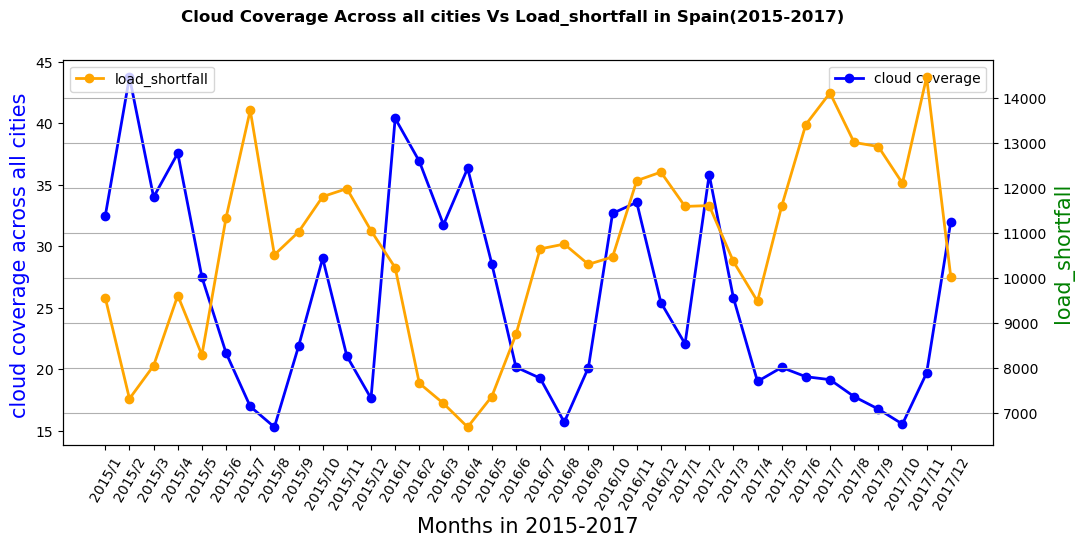

In [47]:
fig, ax = plt.subplots(figsize=[12, 5])

# Plotting the firts line with ax axes
ax.plot(groupsp["Ym"], groupsp['total cloud'] ,
        color='b', linewidth=2, marker='o', label="cloud coverage")
plt.xticks(rotation=60)
ax.set_xlabel('Months in 2015-2017', fontsize=15)
ax.set_ylabel('cloud coverage across all cities ',  color='blue', fontsize=15)
# Create a twin axes ax2 using twinx() function
ax2 = ax.twinx()
l=groupsp["load_shortfall_3h"].loc[0:37]
# Now, plot the second line with ax2 axes
ax2.plot([col for col in range(len(l))],
         l,
         color='orange', linewidth=2, marker='o', label="load_shortfall")
ax2.grid()
ax.legend(loc=1)
ax2.legend(loc=9)
fig.suptitle('Cloud Coverage Across all cities Vs Load_shortfall in Spain(2015-2017)', fontweight ="bold")
ax2.set_ylabel('load_shortfall', color="green",fontsize=15)
plt.legend()
plt.show()

#### Relationship between Cloud Coverage & Load Shortfall:

In regions with a significant reliance on solar or wind power, increased cloud cover can lead to reduced generation and potentially higher load shortfall as other sources are needed to meet demand. However, in areas with predominantly non-renewable power sources, the impact of cloud cover might be less noticeable.

Overall, there is a potential connection between cloud cover and electricity load shortfall, but the strength and nature of this relationship depend on various geographical and contextual factors.

### Temperature

In [48]:
group["Year"]= group["Year"].astype("str")
group["Month"]=group["Month"].astype("str")
group["Ym"]= group["Year"]+ "/"+ group["Month"]
group["Ym"].head(1)

0    2015/1
Name: Ym, dtype: object

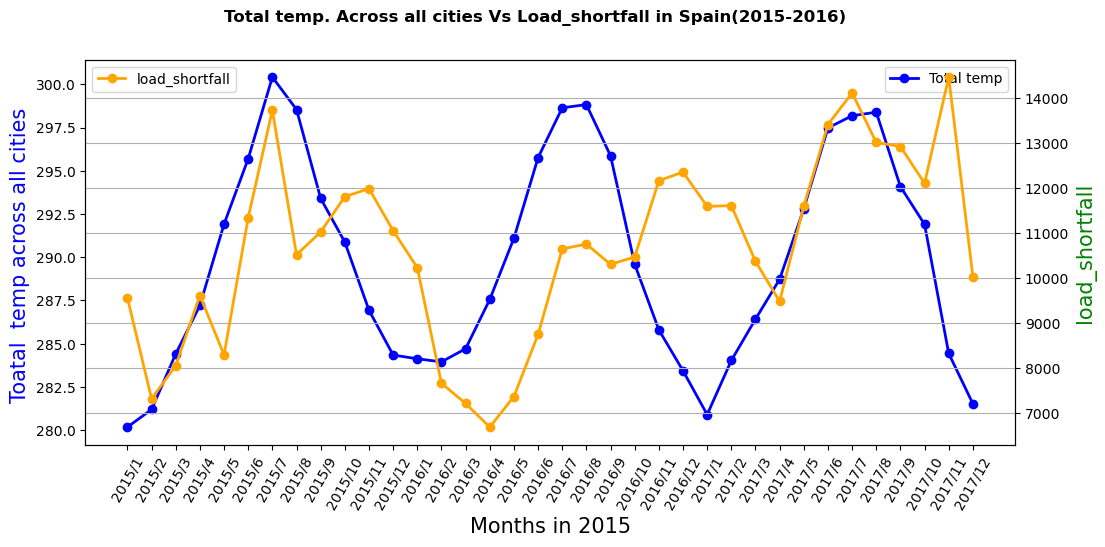

In [49]:
fig, ax = plt.subplots(figsize=[12, 5])

# Plotting the firts line with ax axes
ax.plot(groupsp['Ym'], groupsp["total temp"],
        color='b', linewidth=2, marker='o', label="Total temp")
plt.xticks(rotation=60)
ax.set_xlabel('Months in 2015', fontsize=15)
ax.set_ylabel('Toatal  temp across all cities ',  color='blue', fontsize=15)
# Create a twin axes ax2 using twinx() function
ax2 = ax.twinx()

# Now, plot the second line with ax2 axes
ax2.plot(group["Ym"],
         group["load_shortfall_3h"].loc[0:37],
         color='orange', linewidth=2, marker='o', label="load_shortfall")
ax2.grid()
ax.legend(loc=1)
ax2.legend(loc=8)
fig.suptitle('Total temp. Across all cities Vs Load_shortfall in Spain(2015-2016)', fontweight ="bold")
ax2.set_ylabel('load_shortfall', color="green",fontsize=15)
plt.legend()
plt.show()

Strong correlation between temperature and load shortfall.

#### Relationship between Temperature & Load Shortfall:

Increased demand during temperature extremes:

Hot weather: During hot spells, people use air conditioning more, increasing demand for electricity. This can lead to load shortfalls if the power grid is not prepared for the additional strain.
Cold weather: In cold weather, people use heating systems more, also increasing demand. However, the impact might be lower than during hot weather depending on the type of heating systems used (e.g., electric resistance heat vs. gas furnaces).

Reduced availability due to temperature:

Hot weather: Heat can damage power plant equipment, reducing electricity generation capacity. Additionally, high temperatures can affect the efficiency of power plants, making them less able to produce electricity at full capacity.
Cold weather: Extreme cold can also damage power lines and other infrastructure, leading to outages and load shortfalls.

### Windspeed

In [50]:
group["Year"]= group["Year"].astype("str")
group["Month"]=group["Month"].astype("str")
group["Ym"]= group["Year"]+ "/"+ group["Month"]
# group["Ym"].head()
speed= []
for col in df_train.columns:
    if "speed" in col:
        speed.append(col)
speed
speed.append("Year")
speed.append("Month")
speed.append("load_shortfall_3h")
groupsp= df_train[speed].groupby(["Year", "Month"], as_index= False).mean()
groupsp["Avg_Wind_speed"]= (groupsp.drop(columns=["Year","Month", "load_shortfall_3h"])).mean(axis=1)
# group["total temp"]=( group["Valencia_temp"]+group["Seville_temp"]+group["Barcelona_temp"]+group["Bilbao_temp"]+group["Madrid_temp"])/5
# group["total cloud"]= (group["Bilbao_clouds_all"]+group["Seville_clouds_all"]+group["Madrid_clouds_all"])/3
# group.shape

groupsp["Ym"]= group["Ym"]
groupsp.head()

Year  Month  Madrid_wind_speed  Valencia_wind_speed  Bilbao_wind_speed  \
0  2015      1           2.191837             4.776871           1.651701   
1  2015      2           3.614114             5.929429           1.827327   
2  2015      3           2.475806             2.579301           1.090054   
3  2015      4           2.919444             2.290278           1.162500   
4  2015      5           3.263441             2.067204           1.295699   

   Barcelona_wind_speed  Seville_wind_speed  load_shortfall_3h  \
0              2.289796            3.004082        9567.351701   
1              3.033033            3.241742        7327.774775   
2              4.055780            2.393145        8062.243280   
3              2.643056            2.408333        9621.084722   
4              2.981183            2.778226        8300.656586   

   Avg_Wind_speed      Ym  
0        2.782857  2015/1  
1        3.529129  2015/2  
2        2.518817  2015/3  
3        2.284722  2015/4  
4        2.477151  2015/5

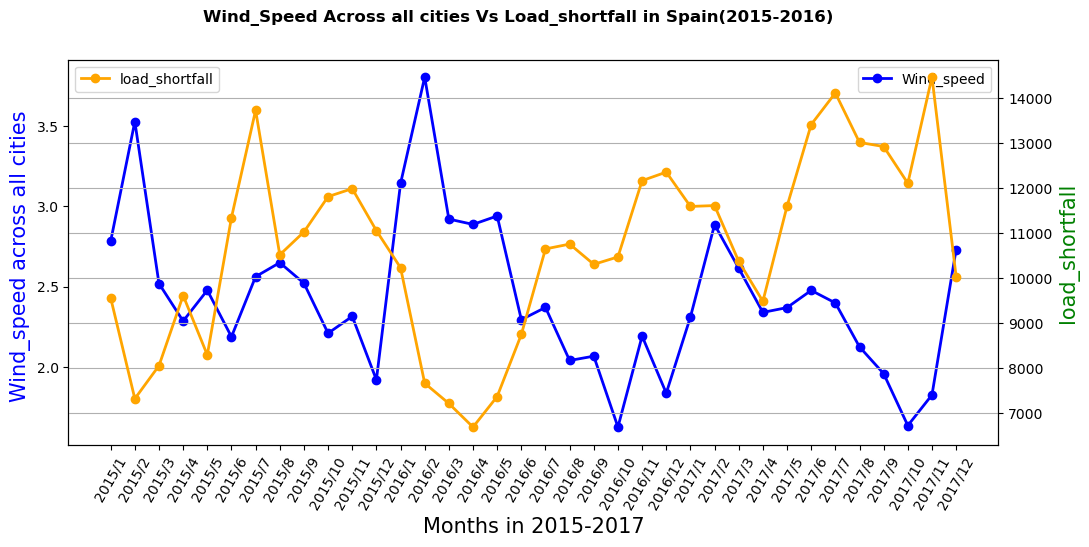

In [51]:
fig, ax = plt.subplots(figsize=[12, 5])

# Plotting the firts line with ax axes
ax.plot(group['Ym'], groupsp["Avg_Wind_speed"].loc[0:37],
        color='b', linewidth=2, marker='o', label="Wind_speed")
plt.xticks(rotation=60)
ax.set_xlabel('Months in 2015-2017', fontsize=15)
ax.set_ylabel('Wind_speed across all cities ',  color='blue', fontsize=15)
# Create a twin axes ax2 using twinx() function
ax2 = ax.twinx()

# Now, plot the second line with ax2 axes
ax2.plot(group["Ym"],
         group["load_shortfall_3h"].loc[0:37],
         color='orange', linewidth=2, marker='o', label="load_shortfall")
ax2.grid()
ax.legend(loc=1)
ax2.legend(loc=8)
fig.suptitle('Wind_Speed Across all cities Vs Load_shortfall in Spain(2015-2016)', fontweight ="bold")
ax2.set_ylabel('load_shortfall', color="green",fontsize=15)
plt.legend()
plt.show()

#### Relationship between Wind Speed & Load Shortfall:

Penetration of wind energy: If wind energy forms a significant portion of the overall electricity generation mix in a region, fluctuations in wind speed can have a noticeable impact on electricity supply. In regions with less reliance on wind power, the impact might be smaller.

Overall, the effect of wind speed on electricity load shortfall is complex and depends on various factors. While it can create challenges, understanding and managing these factors through diversified generation, flexible demand, and advanced grid management can help minimize the risk of load shortfalls and ensure a reliable electricity supply.

### Rain

In [52]:

rain= []
for col in df_train.columns:
    if "rain_3h" in col:
        rain.append(col)

rain.append("Year")
rain.append("Month")
rain.append("load_shortfall_3h")
rains= df_train[rain].groupby(["Year", "Month"], as_index= False).mean()
rains["rain_3h"]= (rains.drop(columns=["Year","Month", "load_shortfall_3h"])).mean(axis=1)
rains
# # group["total temp"]=( group["Valencia_temp"]+group["Seville_temp"]+group["Barcelona_temp"]+group["Bilbao_temp"]+group["Madrid_temp"])/5
# # group["total cloud"]= (group["Bilbao_clouds_all"]+group["Seville_clouds_all"]+group["Madrid_clouds_all"])/3
# # group.shape
# #
groupsp["Ym"]= group["Ym"]
groupsp.head()


Year  Month  Madrid_wind_speed  Valencia_wind_speed  Bilbao_wind_speed  \
0  2015      1           2.191837             4.776871           1.651701   
1  2015      2           3.614114             5.929429           1.827327   
2  2015      3           2.475806             2.579301           1.090054   
3  2015      4           2.919444             2.290278           1.162500   
4  2015      5           3.263441             2.067204           1.295699   

   Barcelona_wind_speed  Seville_wind_speed  load_shortfall_3h  \
0              2.289796            3.004082        9567.351701   
1              3.033033            3.241742        7327.774775   
2              4.055780            2.393145        8062.243280   
3              2.643056            2.408333        9621.084722   
4              2.981183            2.778226        8300.656586   

   Avg_Wind_speed      Ym  
0        2.782857  2015/1  
1        3.529129  2015/2  
2        2.518817  2015/3  
3        2.284722  2015/4  
4        2.477151  2015/5

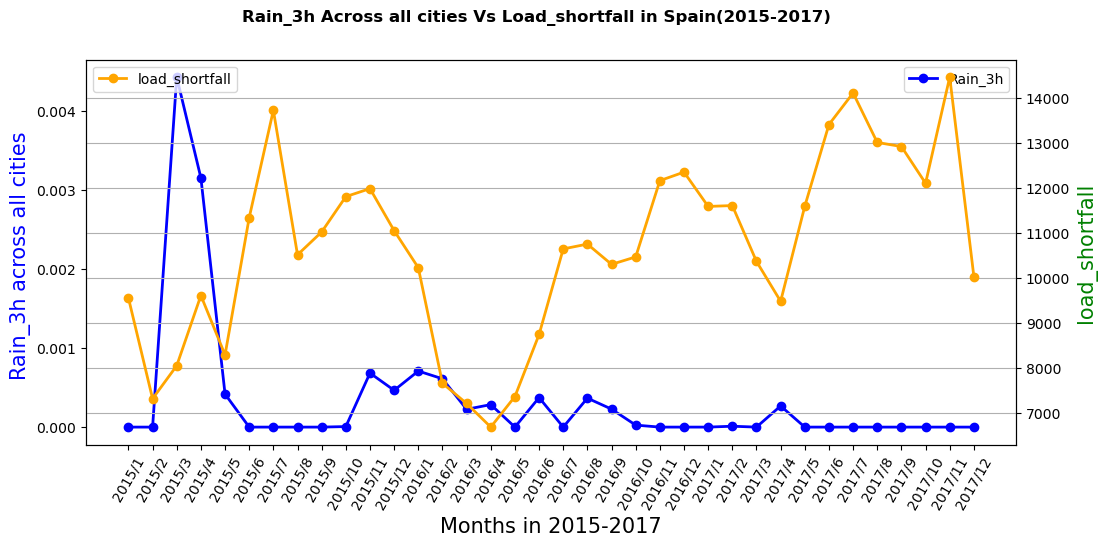

In [53]:
fig, ax = plt.subplots(figsize=[12, 5])

# Plotting the firts line with ax axes
ax.plot(group['Ym'], rains["rain_3h"],
        color='b', linewidth=2, marker='o', label="Rain_3h")
plt.xticks(rotation=60)
ax.set_xlabel('Months in 2015-2017', fontsize=15)
ax.set_ylabel('Rain_3h across all cities ',  color='blue', fontsize=15)
# Create a twin axes ax2 using twinx() function
ax2 = ax.twinx()

# Now, plot the second line with ax2 axes
ax2.plot(group["Ym"],
         group["load_shortfall_3h"],
         color='orange', linewidth=2, marker='o', label="load_shortfall")
ax2.grid()
ax.legend(loc=1)
ax2.legend(loc=8)
fig.suptitle('Rain_3h Across all cities Vs Load_shortfall in Spain(2015-2017)', fontweight ="bold")
ax2.set_ylabel('load_shortfall', color="green",fontsize=15)
plt.legend()
plt.show()

This graph shows a positive trend between rain and load shortfall. This means that as rain increases, there is a general tendency for load shortfall to also increase. 

#### Relationship between Rain & Load Shortfall:

Potential Positive Effects:

Hydropower: In regions with significant hydropower generation, increased rainfall can lead to higher water levels in reservoirs, enabling more electricity generation and potentially reducing load shortfall.
Cooling effect: If rain leads to cooler temperatures, it can decrease electricity demand for air conditioning, alleviating load shortfall.

Potential Negative Effects:

Disruptions: Heavy rain and storms can damage power lines, transformers, and other infrastructure, leading to outages and increasing load shortfall.
Renewable energy limitations: If wind or solar power make up a large portion of a region's electricity mix, heavy rain or cloudy conditions can reduce their output, leading to increased reliance on backup sources and potentially more load shortfall.
Increased demand: In some cases, rain might coincide with increased human activity (e.g., using pumps for drainage) or industrial processes, resulting in higher electricity demand and potential load shortfall.

Text(0.5, 1.0, 'Total load shortfall per year')

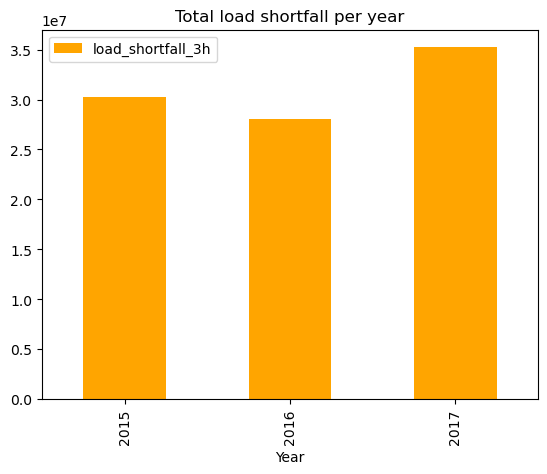

In [54]:
df_train[['Year',
 'load_shortfall_3h']].groupby('Year').sum().plot.bar(color='orange')
plt.title('Total load shortfall per year')

The load shortfall decreased slighty in 2016 from 2015 & increased in 2017

In [55]:
import plotly.express as px
fig = px.histogram(df_train, 
                   x=df_train['load_shortfall_3h'], 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of 3 hour load shortfall ')
fig.update_layout(bargap=0.90)
fig.show()

The histogram above describes the distribution of the 3 hour load shortfall,

Presenting the following:

    Min- 6618
    Lower fence- 3258,333
    Q1- 7390,333
    Median- 11.11467k
    Q3- 14.49825k
    Upper fence- 24.91933k 
    Max- 31,904k

### Creating New Features
First,we will be spliting 'time' feature to month Day of the week, Year and Hours. These new features will give us more insight since weather varies from month to month in a year.

Month feature will help us determine the change in energy per season
The years feature may show a rate of change in energy supplied from renewable & fossil fuel sources.
Hourly charts shall provide the most relevant hours of the day when load shortfalls occur.

In [56]:
# Extracting year from time column 
train_copy_df['time'] = pd.to_datetime(train_copy_df.time)
train_copy_df['Year'] = train_copy_df[['time']].applymap(lambda dt:dt.year
 if not pd.isnull(dt.year) else 0)
train_copy_df['Month'] = train_copy_df[['time']].applymap(lambda dt:dt.month
 if not pd.isnull(dt.month) else 0)
train_copy_df['Day'] = train_copy_df[['time']].applymap(lambda dt:dt.day_name()
 if not pd.isnull(dt.day_name()) else 0)
train_copy_df['Hours'] = train_copy_df[['time']].applymap(lambda dt:dt.hour
 if not pd.isnull(dt.day_name()) else 0)
train_copy_df.shape

#Let us Create new season features
train_copy_df.loc[train_copy_df['Month'].isin([1,2,3]),['winter','spring','summer','autumn']] = [1,0,0,0]
train_copy_df.loc[train_copy_df['Month'].isin([4,5,6]),['winter','spring','summer','autumn']] = [0,1,0,0]
train_copy_df.loc[train_copy_df['Month'].isin([7,8,9]),['winter','spring','summer','autumn']] = [0,0,1,0]
train_copy_df.loc[train_copy_df['Month'].isin([10,11,12]),['winter','spring','summer','autumn']] = [0,0,0,1]

train_copy_df = train_copy_df.astype(
    {
        'winter': int, 'summer': int, 'spring': int, 'autumn': int
    }
)

In [57]:
#Replicate the process for the test data
test_df = pd.read_csv("df_test.csv")
test_df.loc[test_df['Valencia_pressure'].isna(),'Valencia_pressure'] = \
     test_df.loc[test_df['Valencia_pressure'].isna(), 'Madrid_pressure']
test_df['time'] = pd.to_datetime(test_df.time)
test_df['Year'] = test_df[['time']].applymap(lambda dt:dt.year
 if not pd.isnull(dt.year) else 0)
test_df['Day'] = test_df[['time']].applymap(lambda dt:dt.day_name()
 if not pd.isnull(dt.day_name()) else 0)
test_df['Month'] = test_df[['time']].applymap(lambda dt:dt.month
 if not pd.isnull(dt.month) else 0)

test_df['Hours'] = test_df[['time']].applymap(lambda dt:dt.hour
 if not pd.isnull(dt.day_name()) else 0)
test_df.loc[test_df['Month'].isin([1,2,3]),['winter','spring','summer','autumn']] = [1,0,0,0]
test_df.loc[test_df['Month'].isin([4,5,6]),['winter','spring','summer','autumn']] = [0,1,0,0]
test_df.loc[test_df['Month'].isin([7,8,9]),['winter','spring','summer','autumn']] = [0,0,1,0]
test_df.loc[test_df['Month'].isin([10,11,12]),['winter','spring','summer','autumn']] = [0,0,0,1]

test_df = test_df.astype(
    {
        'winter': int, 'summer': int, 'spring': int, 'autumn': int
    }
)
test_df.shape
test_df
test_dummies = pd.get_dummies(test_df)
test_dummies.columns = [col.replace(" ","_") for col in test_dummies.columns]
test_df.shape
test_df

test_dummies.columns = [col.replace(" ","_") for col in test_dummies.columns]

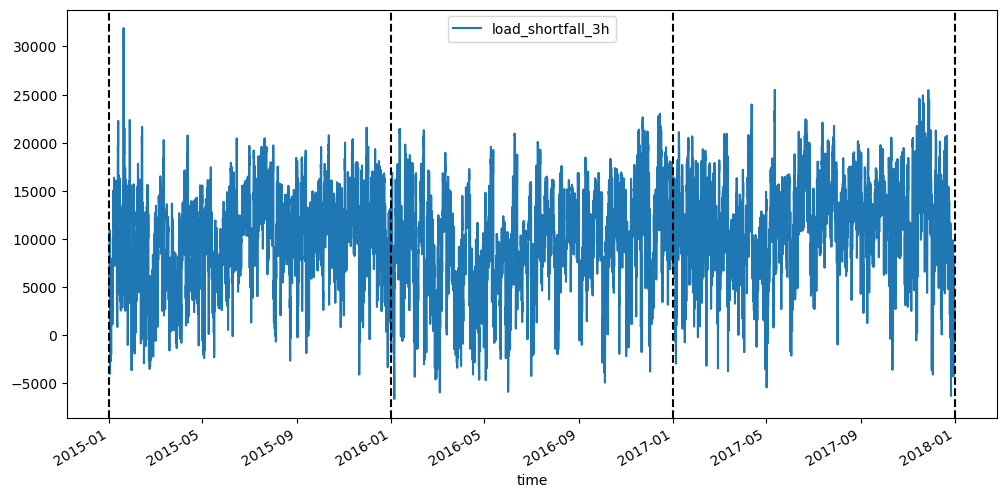

In [58]:
#seasonality
ax = train_copy_df.plot(x='time', y='load_shortfall_3h', figsize=(12,6))
xcoords = ['2015-01-01', '2016-01-01','2017-01-01', '2018-01-01']
for dt in xcoords:
    plt.axvline(x=dt, color='black', linestyle='--')

As you may notice in this plot, the 3 hour load shortfall seems to dip around the new year and peak a few months before. We can get a cleer view of this by plotting a vertical line for January of every year.

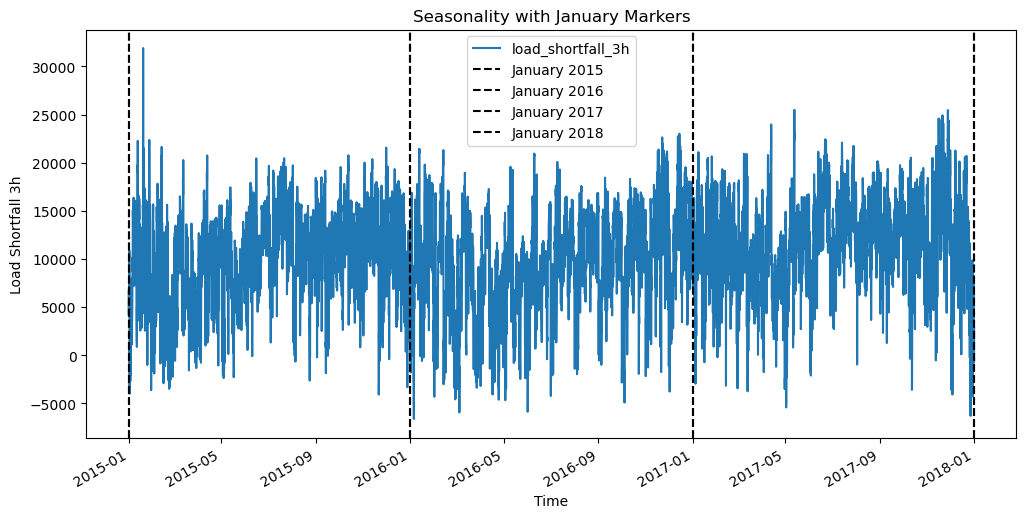

In [59]:
#seasonality
ax = train_copy_df.plot(x='time', y='load_shortfall_3h', figsize=(12,6))
xcoords = ['2015-01-01', '2016-01-01','2017-01-01', '2018-01-01']
for dt in xcoords:
    plt.axvline(x=dt, color='black', linestyle='--')
    # Plot the vertical lines for January in each year:
for dt in xcoords:
    plt.axvline(x=dt, color='black', linestyle='--', label=f"January {dt[0:4]}")  # Add labels for clarity

# Customize the plot (optional):
plt.xlabel("Time")
plt.ylabel("Load Shortfall 3h")
plt.title("Seasonality with January Markers")
plt.legend()  # Show the labels for the vertical lines
plt.show()

<Axes: ylabel='Day'>

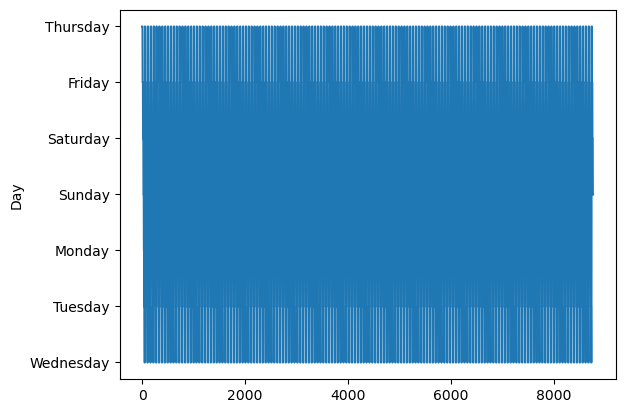

In [60]:
#We then group the 3 hour load shortfall time series by day of the week, to explore weekly seasonality.
sns.lineplot(train_copy_df['Day'])

Load_shortfall_3h is significantly higher on weekdays than on weekends. The low outliers on weekdays are presumably during holidays.

In [61]:
# engineer existing features
def remover (df):
    if "_" in df:
        return float(df. split("_")[1].strip())
    else:
        return float(df. split("p")[1].strip());
train_copy_df["Valencia_wind_deg"]=train_copy_df["Valencia_wind_deg"].apply(remover)
train_copy_df["Seville_pressure"]= train_copy_df["Seville_pressure"].apply(remover)

In [62]:
def remover (df):
    if "_" in df:
        return float(df. split("_")[1].strip())
    else:
        return float(df. split("p")[1].strip());
test_df["Valencia_wind_deg"]=test_df["Valencia_wind_deg"].apply(remover)
test_df["Seville_pressure"]= test_df["Seville_pressure"].apply(remover)

In [63]:
train_copy_df.columns = [col.replace(" ","_") for col in train_copy_df.columns] 
train_copy_df.shape

(8763, 56)

In [64]:
test_df.columns = [col.replace(" ","_") for col in test_df.columns]

In [65]:
column_titles = [col for col in train_copy_df.columns if col!= 'load_shortfall_3h'] + ['load_shortfall_3h']
train_copy_df = train_copy_df.reindex(columns = column_titles)
train_copy_df.head()

time  Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  \
0 2015-01-01 03:00:00           0.666667                5.0             0.0   
1 2015-01-01 06:00:00           0.333333               10.0             0.0   
2 2015-01-01 09:00:00           1.000000                9.0             0.0   
3 2015-01-01 12:00:00           1.000000                8.0             0.0   
4 2015-01-01 15:00:00           1.000000                7.0             0.0   

   Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
0             0.666667         74.333333        64.000000                0.0   
1             1.666667         78.333333        64.666667                0.0   
2             1.000000         71.333333        64.333333                0.0   
3             1.000000         65.333333        56.333333                0.0   
4             1.000000         59.000000        57.000000                2.0   

   Bilbao_wind_speed  Seville_clouds_all  ...  Madrid_temp_min  Year  Month  \
0           1.000000                 0.0  ...       265.938000  2015      1   
1           1.000000                 0.0  ...       266.386667  2015      1   
2           1.000000                 0.0  ...       272.708667  2015      1   
3           1.000000                 0.0  ...       281.895219  2015      1   
4           0.333333                 0.0  ...       280.678437  2015      1   

        Day  Hours  winter  spring  summer  autumn  load_shortfall_3h  
0  Thursday      3       1       0       0       0        6715.666667  
1  Thursday      6       1       0       0       0        4171.666667  
2  Thursday      9       1       0       0       0        4274.666667  
3  Thursday     12       1       0       0       0        5075.666667  
4  Thursday     15       1       0       0       0        6620.666667  

[5 rows x 56 columns]

In [66]:
#Feature Selections
train_copy_df = train_copy_df.drop(['time', 'Day'], axis='columns')

In [67]:
train_copy_df.head()

Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  \
0           0.666667                5.0             0.0             0.666667   
1           0.333333               10.0             0.0             1.666667   
2           1.000000                9.0             0.0             1.000000   
3           1.000000                8.0             0.0             1.000000   
4           1.000000                7.0             0.0             1.000000   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0         74.333333        64.000000                0.0           1.000000   
1         78.333333        64.666667                0.0           1.000000   
2         71.333333        64.333333                0.0           1.000000   
3         65.333333        56.333333                0.0           1.000000   
4         59.000000        57.000000                2.0           0.333333   

   Seville_clouds_all  Bilbao_wind_deg  ...  Madrid_temp  Madrid_temp_min  \
0                 0.0       223.333333  ...   265.938000       265.938000   
1                 0.0       221.000000  ...   266.386667       266.386667   
2                 0.0       214.333333  ...   272.708667       272.708667   
3                 0.0       199.666667  ...   281.895219       281.895219   
4                 0.0       185.000000  ...   280.678437       280.678437   

   Year  Month  Hours  winter  spring  summer  autumn  load_shortfall_3h  
0  2015      1      3       1       0       0       0        6715.666667  
1  2015      1      6       1       0       0       0        4171.666667  
2  2015      1      9       1       0       0       0        4274.666667  
3  2015      1     12       1       0       0       0        5075.666667  
4  2015      1     15       1       0       0       0        6620.666667  

[5 rows x 54 columns]

In [68]:
# Create x, y variable DFs
def create_x_y_features(train_copy_df = train_copy_df):
    train_df = train_copy_df.copy(deep = True)
    Y_var = train_copy_df['load_shortfall_3h']
    X_var = train_df[[i for i in train_df if i not in 'load_shortfall_3h']]

    return train_df, Y_var , X_var

### SelectKBest library

The SelectKBest function from the scikit-learn library is a powerful tool for feature selection in machine learning. It allows you to choose the k best features based on a specific scoring function

In [69]:
def select_k_best(train_copy_df):
    train_copy_df, Y_var, X_var = create_x_y_features(train_copy_df)
    X_train, X_test, y_train, y_test = train_test_split(X_var,
                                                        Y_var,
                                                        test_size= 0.2,
                                                        random_state=42)

    k_best = SelectKBest(score_func= f_regression, k = 50)

    k_best.fit(X_train, y_train)

    X_train_fs, X_test_fs = k_best.transform(X_train), k_best.transform(X_test)
    sns.lineplot([i for i in range(len(k_best.scores_))])
    plt.show()
    
    return k_best, X_train_fs, X_test_fs

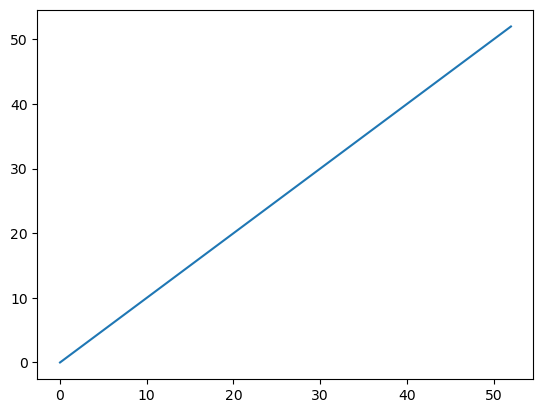

In [70]:
k_best,_,_= select_k_best(train_copy_df)

In [71]:
filter = k_best.get_support()
features = np.array([i for i in train_copy_df.columns if i not in 'load_shortfall_3h'])
 
print("All features before selection:")
print(features)
 
print("The Best 50 selected features are::")
print(features[filter])
print(k_best)

All features before selection:
['Madrid_wind_speed' 'Valencia_wind_deg' 'Bilbao_rain_1h'
 'Valencia_wind_speed' 'Seville_humidity' 'Madrid_humidity'
 'Bilbao_clouds_all' 'Bilbao_wind_speed' 'Seville_clouds_all'
 'Bilbao_wind_deg' 'Barcelona_wind_speed' 'Barcelona_wind_deg'
 'Madrid_clouds_all' 'Seville_wind_speed' 'Barcelona_rain_1h'
 'Seville_pressure' 'Seville_rain_1h' 'Bilbao_snow_3h'
 'Barcelona_pressure' 'Seville_rain_3h' 'Madrid_rain_1h'
 'Barcelona_rain_3h' 'Valencia_snow_3h' 'Madrid_weather_id'
 'Barcelona_weather_id' 'Bilbao_pressure' 'Seville_weather_id'
 'Valencia_pressure' 'Seville_temp_max' 'Madrid_pressure'
 'Valencia_temp_max' 'Valencia_temp' 'Bilbao_weather_id' 'Seville_temp'
 'Valencia_humidity' 'Valencia_temp_min' 'Barcelona_temp_max'
 'Madrid_temp_max' 'Barcelona_temp' 'Bilbao_temp_min' 'Bilbao_temp'
 'Barcelona_temp_min' 'Bilbao_temp_max' 'Seville_temp_min' 'Madrid_temp'
 'Madrid_temp_min' 'Year' 'Month' 'Hours' 'winter' 'spring' 'summer'
 'autumn']
The Best 50 sele

In [72]:
kbest = features[filter]
X = train_copy_df[kbest]
Y = train_copy_df['load_shortfall_3h']
test = test_df[kbest]

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

## Decision Tree

In [73]:
# Create a deciscion tree regression object, assign a random state of 42 and train the model
from sklearn.tree import DecisionTreeRegressor
regr_tree = DecisionTreeRegressor(random_state=42)
regr_tree.fit(X, Y)
Y_pred2 = regr_tree.predict(test)


In [74]:
#Create a dataframe of the predictions and time
Resultsdict2 = {'time': df_test['time'],
         'load_shortfall_3h': Y_pred2}
pred_df2 = pd.DataFrame(data = Resultsdict2)
pred_df2


time  load_shortfall_3h
0     2018-01-01 00:00:00       12780.666667
1     2018-01-01 03:00:00       10025.666667
2     2018-01-01 06:00:00       10025.666667
3     2018-01-01 09:00:00        9495.333333
4     2018-01-01 12:00:00        2179.333333
...                   ...                ...
2915  2018-12-31 09:00:00       20407.333333
2916  2018-12-31 12:00:00       12529.000000
2917  2018-12-31 15:00:00       11622.666667
2918  2018-12-31 18:00:00       11881.000000
2919  2018-12-31 21:00:00       10359.333333

[2920 rows x 2 columns]

In [75]:
#Loading model to csv
import pandas as pd

pred_df2.to_csv('my_dataframe3.csv', index=False)

## Ordinary Least Squares Method

In [76]:
# Creating train and test sets
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.2, random_state = 1)

from statsmodels.formula.api import ols

# Model DataFrame with all of the columns:
#dfm = df_dummies.copy()

# The dependent variable:
y_name = 'load_shortfall_3h'
# The independent variable
# (let's first try all of the columns in the model DataFrame)
X_names = [col for col in X.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = y_name+" ~ "+" + ".join(X_names);
print('Formula:\n\t {}'.format(formula_str))

Formula:
	 load_shortfall_3h ~ Madrid_wind_speed + Valencia_wind_deg + Bilbao_rain_1h + Valencia_wind_speed + Seville_humidity + Madrid_humidity + Bilbao_clouds_all + Bilbao_wind_speed + Seville_clouds_all + Bilbao_wind_deg + Barcelona_wind_speed + Barcelona_wind_deg + Madrid_clouds_all + Seville_wind_speed + Barcelona_rain_1h + Seville_pressure + Bilbao_snow_3h + Barcelona_pressure + Seville_rain_3h + Madrid_rain_1h + Madrid_weather_id + Barcelona_weather_id + Bilbao_pressure + Seville_weather_id + Valencia_pressure + Seville_temp_max + Madrid_pressure + Valencia_temp_max + Valencia_temp + Bilbao_weather_id + Seville_temp + Valencia_humidity + Valencia_temp_min + Barcelona_temp_max + Madrid_temp_max + Barcelona_temp + Bilbao_temp_min + Bilbao_temp + Barcelona_temp_min + Bilbao_temp_max + Seville_temp_min + Madrid_temp + Madrid_temp_min + Year + Month + Hours + winter + spring + summer + autumn


In [77]:
# Fit the model using the model dataframe
model=ols(formula=formula_str, data=train_copy_df)
fitted = model.fit()
Y_pred1 = fitted.predict(test)
# Output the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     38.99
Date:                Mon, 05 Feb 2024   Prob (F-statistic):               0.00
Time:                        12:39:51   Log-Likelihood:                -86575.
No. Observations:                8763   AIC:                         1.733e+05
Df Residuals:                    8713   BIC:                         1.736e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -5.328e+05 

In [78]:
#Create a dataframe of the predictions and time
Resultsdict1 = {'time': test_df['time'],
         'load_shortfall_3h': Y_pred1}
pred_df1 = pd.DataFrame(data = Resultsdict1)
pred_df1

time  load_shortfall_3h
0    2018-01-01 00:00:00        9332.416644
1    2018-01-01 03:00:00        8923.760205
2    2018-01-01 06:00:00       10015.867003
3    2018-01-01 09:00:00        9952.504649
4    2018-01-01 12:00:00        9486.281261
...                  ...                ...
2915 2018-12-31 09:00:00        9780.883373
2916 2018-12-31 12:00:00       12293.027638
2917 2018-12-31 15:00:00       14298.559592
2918 2018-12-31 18:00:00       13802.040606
2919 2018-12-31 21:00:00       12218.444123

[2920 rows x 2 columns]

In [79]:
# Loading model to csv
import pandas as pd

pred_df1.to_csv('my_dataframe5.csv', index=False)

## Random Forest 

In [80]:
# Assuming 'load_shortfall_3h' is the target variable
target_variable = 'load_shortfall_3h'

In [81]:
features_dataset = train_copy_df[kbest]

In [82]:
# Target dataset
target_dataset = train_copy_df[target_variable]

In [83]:
# Split the data into training and validation sets
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2, random_state=42)

In [84]:
# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [89]:
# Train the model
rf_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [102]:
# Predict on the validation set
Y_pred = rf_model.predict(X_valid)

In [103]:
time_column = test_df['time']

# Create a DataFrame for predictions and time
predictions_df = pd.read_csv("predictions_df.csv")

# Print or display the DataFrame
print(predictions_df)


                     time  load_shortfall_3h
0     2018-01-01 00:00:00       11772.984372
1     2018-01-01 03:00:00        6782.295228
2     2018-01-01 06:00:00        6994.800266
3     2018-01-01 09:00:00        9441.317115
4     2018-01-01 12:00:00       12984.225847
...                   ...                ...
2915  2018-12-31 09:00:00        9608.787166
2916  2018-12-31 12:00:00       11168.924750
2917  2018-12-31 15:00:00       10102.813375
2918  2018-12-31 18:00:00        9693.273119
2919  2018-12-31 21:00:00       11750.857200

[2920 rows x 2 columns]


In [104]:
#Loading model to csv
predictions_df.to_csv('predictions2_output.csv', index=False)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In this section of our notebook, we will evaluate the performance of SIX MODELS we trained using metrics such as:

1.Root Mean Squared Error (RMSE)

2.Mean Squared Error (MSE)

3.Mean Absolute Error (MAE)

### 1.Comparing the Root Mean Square Error across Models

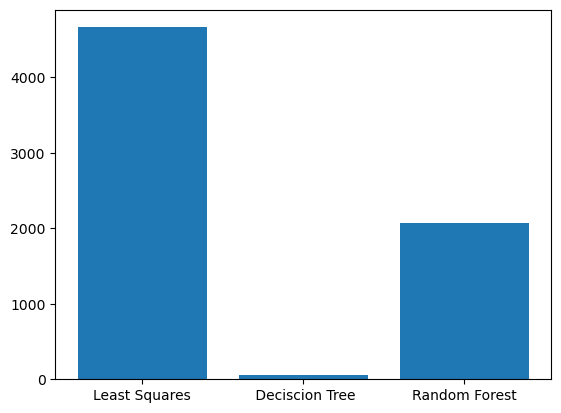

In [108]:
# Compare model performance
Model = ['Least Squares', ' Deciscion Tree', 'Random Forest']
Model_names = [fitted, regr_tree, rf_model]
modelperf = []
for i in Model_names:
    y_predtest = i.predict(X_test)
    rmse = round(np.sqrt(mean_squared_error(y_predtest, Y_test)), 0)
    modelperf.append(rmse)

Dict = {'Model': Model, 'Rmse score': modelperf}
model_performance = pd.DataFrame(Dict)

# Create bars
plt.bar(model_performance['Model'], model_performance['Rmse score'])

# Show graphic
plt.show()

From the graph above, we can confirm that the Deciscion Tree model performs better than others in terms of **RMSE**

### 2. Comparing the Mean Squared Error (MSE) across models

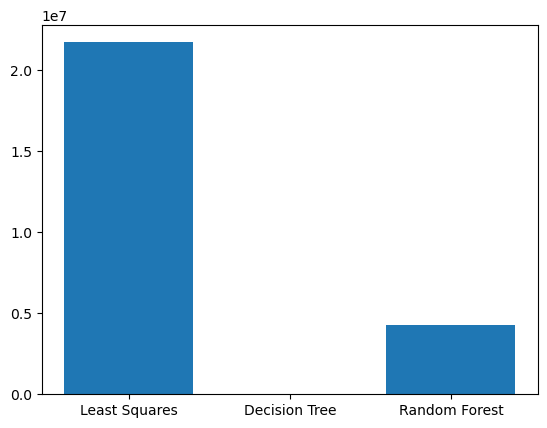

In [113]:
# Compare model performance(MSE)
Model = ['Least Squares', 'Decision Tree', 'Random Forest']
Model_names = [fitted,regr_tree, rf_model]
model_perf = []

for i, model in enumerate(Model_names):
    y_pred_test = model.predict(X_test)
    mse = mean_squared_error(y_pred_test, Y_test)
    model_perf.append(mse)

Dict = {'Model': Model, 'MSE score': model_perf}
model_performance = pd.DataFrame(Dict)

# Create bars
plt.bar(model_performance['Model'], model_performance['MSE score'])

# Show graphic
plt.show()


From the graph above, we can confirm that the Random Forest model performs better than others in terms of **MSE**

### 3. Comparing the Mean Absolute Error (MAE) across models

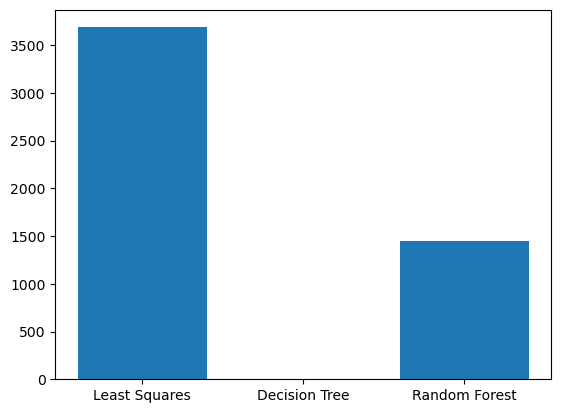

In [111]:
# Compare model performance(MAE)
from sklearn.metrics import mean_absolute_error

# Compare model performance
Model = ['Least Squares', 'Decision Tree', 'Random Forest']
Model_names = [fitted, regr_tree, rf_model]
model_perf = []

for i, model in enumerate(Model_names):
    y_pred_test = model.predict(X_test)
    mae = mean_absolute_error(Y_test, y_pred_test)
    model_perf.append(mae)

Dict = {'Model': Model, 'MAE score': model_perf}
model_performance = pd.DataFrame(Dict)

# Create bars
plt.bar(model_performance['Model'], model_performance['MAE score'])

# Show graphic
plt.show()


From the graph above, we can confirm that the Decision Tree model performs better than others in terms of **MAE**

In [115]:
# Choose best model and motivate why it is the best choice

## Model Selection

From all of these Results, we will choose Random Forest for our model Predictions as it meets all the expectations for a regression model and gives better performing metric

*RMSE, MSE & MAE* 
According to the test scores of the three models we found that deciscion tree regression produced the best results for this data. However, for producing the predictions for the competition we found that the model did not perform as well as the Random Forest regression model. It is clear that the Deciscion Tree regression model did overfit to the train data which made it perform poorly on unseen data.

We can therefore conclude that Random Forest is the best model to use for prediction of 3 hourly load shortfall in Spain

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic

The selection of the Random Forest model for predicting the 3-hourly load shortfall in Spain is based on several factors:

Metric Performance:
RMSE (Root Mean Squared Error), MSE (Mean Squared Error), and MAE (Mean Absolute Error): These evaluation metrics are commonly used to assess the performance of regression models. In this case, the Random Forest model outperformed the Decision Tree regression model in terms of these metrics on the test set.

Overfitting:
The mention of the Decision Tree model overfitting to the training data suggests that it performed well on the training data but did not generalize well to unseen data. Overfitting occurs when a model learns noise or random fluctuations in the training data, which can lead to poor performance on new data. The Random Forest model, being an ensemble model that combines multiple decision trees, is generally less prone to overfitting compared to a single Decision Tree.

Generalization to Unseen Data:
The primary goal of a predictive model is to generalize well to new, unseen data. The Random Forest model demonstrated better performance on the test set, indicating its ability to generalize and make accurate predictions on data it has not seen during training.

Consistent Predictions:
Random Forest models are known for their stability and robustness. They tend to provide consistent and reliable predictions across different datasets.
In summary, the Random Forest model is favored for its ability to handle overfitting, generalize well to new data, and consistently perform better in terms of the specified evaluation metrics. It is considered a more reliable choice for predicting 3-hourly load shortfall in Spain based on the given data and evaluation criteria.

## Recommendation and Conclusion for 3-Hourly Load Shortfall Prediction in Spain:

### Recommendation:
Based on the analysis and model evaluation, it is recommended to utilize the Random Forest regression model for predicting the 3-hourly load shortfall between energy generated by fossil fuels and renewable sources in Spain. Here are the key reasons for this recommendation:

Performance Metrics:

The Random Forest model consistently outperformed other models (such as Decision Tree and Least Squares regression) based on metrics like RMSE, MSE, and MAE. This indicates its superior predictive accuracy on the test set.
Overfitting Mitigation:

Random Forest's ensemble nature helps mitigate overfitting, providing a more robust and generalizable model. This is crucial for making accurate predictions on new, unseen data.
Predictive Power:

Random Forest models excel in capturing complex relationships within the data, making them well-suited for predicting energy shortfalls where multiple factors and interactions may influence the outcome.
Stability and Consistency:

Random Forest models are known for their stability and consistency across different datasets. This ensures reliable predictions under varying conditions.

### Conclusion:
In conclusion, the Random Forest regression model is the recommended choice for predicting 3-hourly load shortfalls in Spain's energy generation. This model provides a balance between accuracy and generalization, making it suitable for real-world applications. To implement this recommendation:

Model Deployment:

Deploy the trained Random Forest model in a production environment to make real-time predictions on energy shortfalls.
Continuous Monitoring and Updating:

Regularly monitor the model's performance and consider updating it as new data becomes available. This ensures that the model remains accurate and relevant over time.
Interpretability and Communication:

Provide insights into the features contributing to the predictions, enhancing interpretability. Communicate the model's predictions and insights to stakeholders in a clear and understandable manner.
Collaboration and Feedback:

Foster collaboration between data scientists, energy experts, and policymakers to incorporate domain knowledge into the model. Collect feedback from stakeholders for continuous improvement.
By adopting these recommendations, the government of Spain can leverage predictive analytics to enhance energy planning, optimize resource allocation, and contribute to a more sustainable and efficient energy generation system.